In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [5]:
#reeading data
bikesharing = pd.read_csv('day.csv')
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bikesharing.shape

(730, 16)

In [9]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
# dropping the duplicates

bikesharing.drop_duplicates(inplace=True)

In [13]:
bikesharing.shape

(730, 16)

In [14]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

bikesharing.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [15]:
# Encoding/mapping the season column

bikesharing.season = bikesharing.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [17]:
# Encoding/mapping the month column

bikesharing.mnth = bikesharing.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',
                                           8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [19]:
# Encoding/mapping the weekday column

bikesharing.weekday = bikesharing.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [21]:
# Encoding/mapping the weathersit column

bikesharing.weathersit = bikesharing.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [23]:
# check the head of the dataset

bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


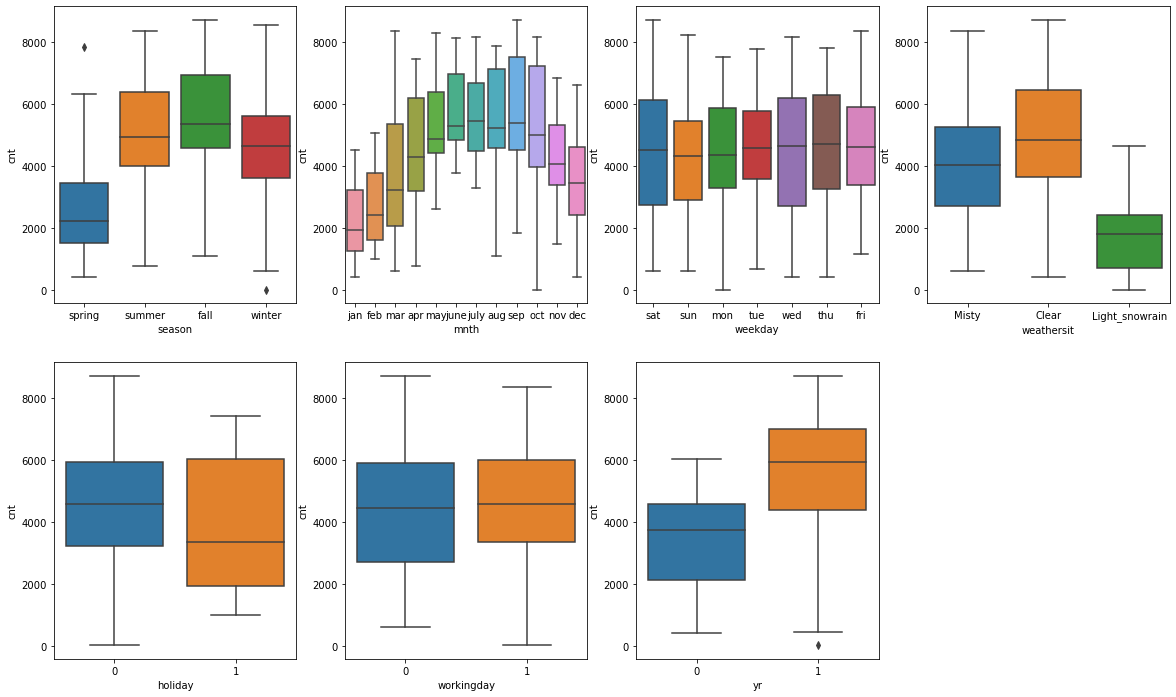

In [28]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)
plt.show()

In [34]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=bikesharing)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=bikesharing, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

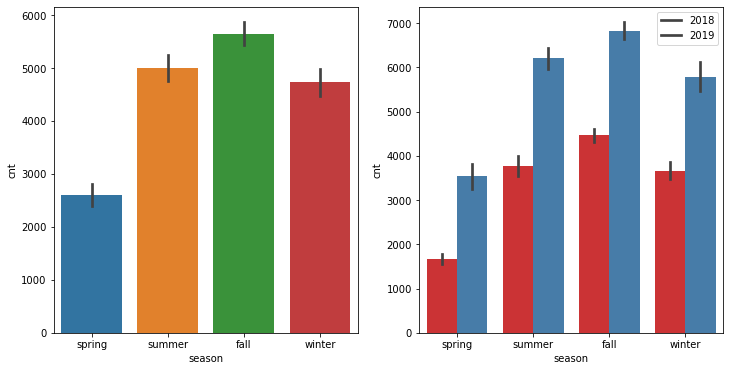

In [35]:
# plotting visualization for season column

plot_cat_columns('season')

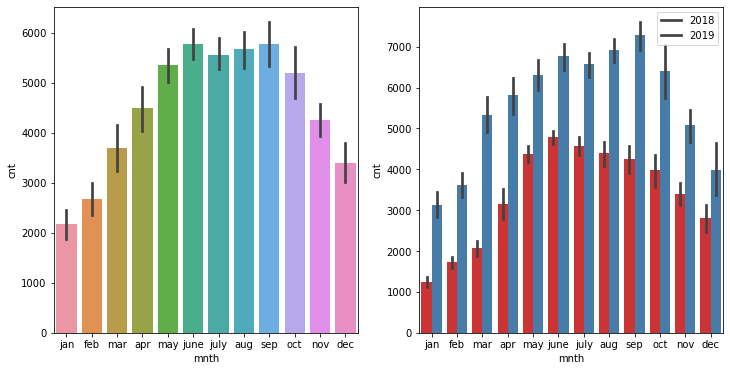

In [36]:
# plotting visualization for month column

plot_cat_columns('mnth')

Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year.
Number of booking for each month seems to have increased from 2018 to 2019.

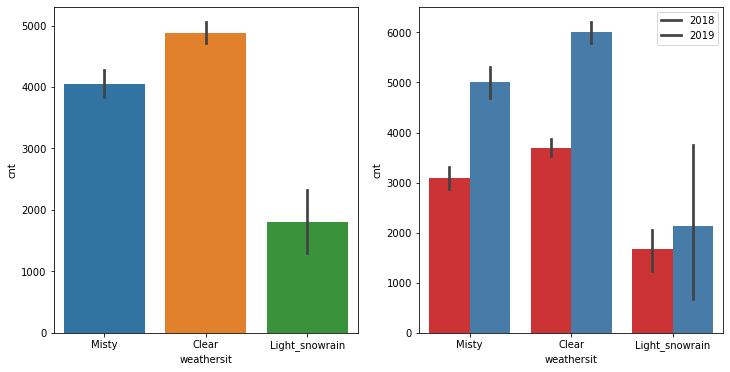

In [37]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

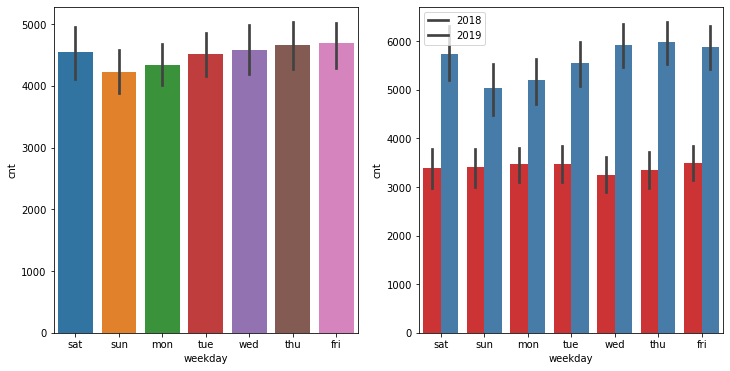

In [38]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

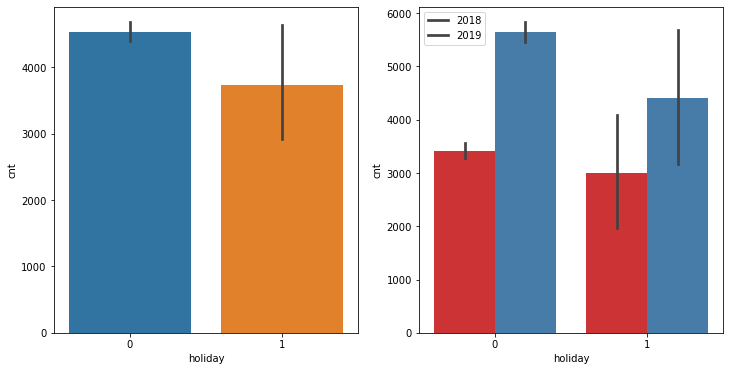

In [39]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

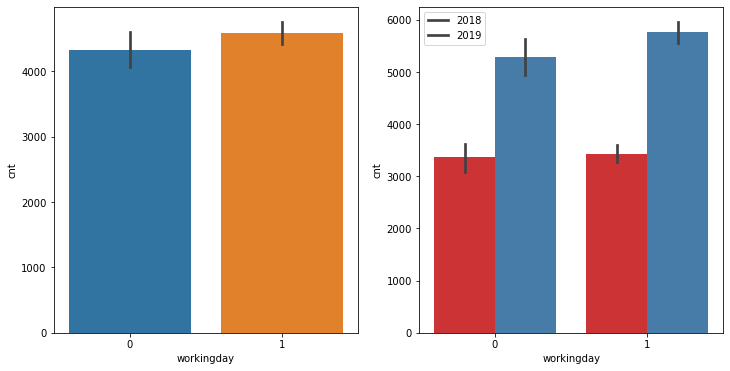

In [40]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019

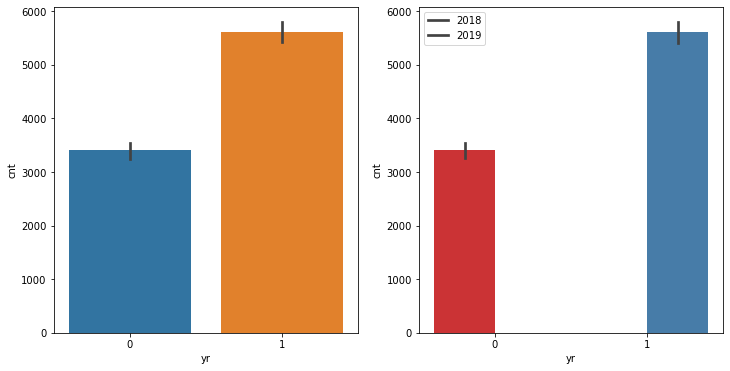

In [42]:
# plotting visualization for year column

plot_cat_columns('yr')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

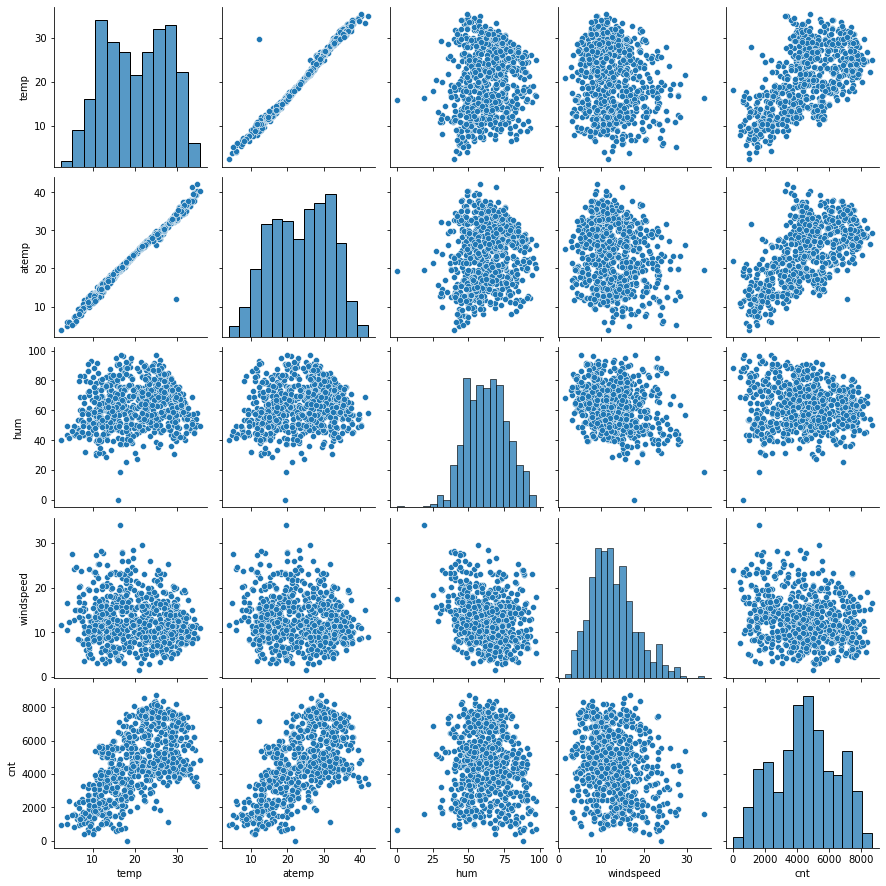

In [45]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=bikesharing,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

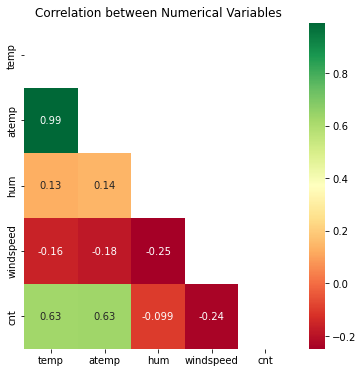

In [47]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bikesharing[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(bikesharing[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

In [49]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(bikesharing.mnth,drop_first=True)
weekdays_df=pd.get_dummies(bikesharing.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bikesharing.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bikesharing.season,drop_first=True)

In [51]:
# Merging  the dataframe, with the dummy variable dataset. 

bikesharing_new = pd.concat([bikesharing,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [52]:
bikesharing_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [54]:
bikesharing_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [56]:
# dropping unnecessary columns as we have already created dummy variable out of it.

bikesharing_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [57]:
bikesharing_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [58]:
bikesharing_new.shape

(730, 30)

In [59]:
bikesharing_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

In [180]:
np.random.seed(0)
df_train, df_test = train_test_split(bikesharing_new, train_size = 0.7, random_state = 100)

In [181]:
df_train.shape

(510, 30)

In [182]:
df_test.shape

(220, 30)

In [183]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [184]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [185]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [186]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [187]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


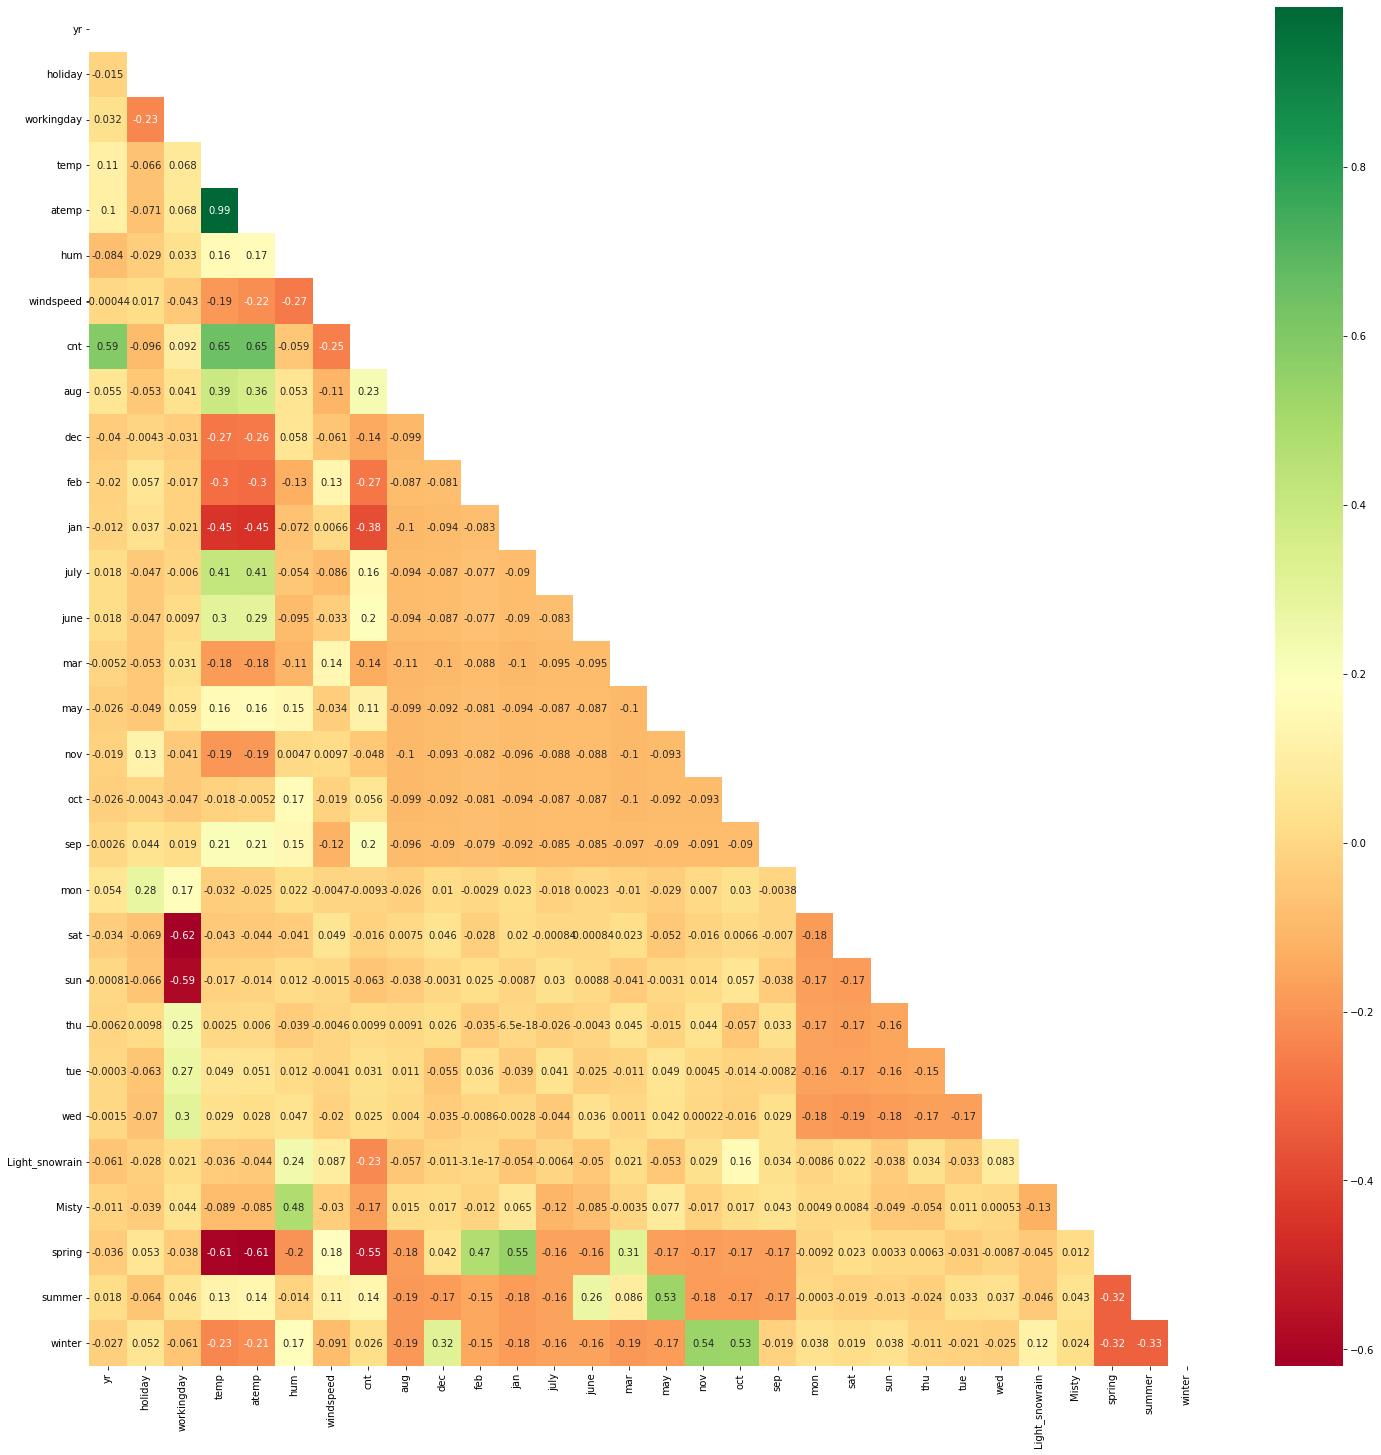

In [188]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

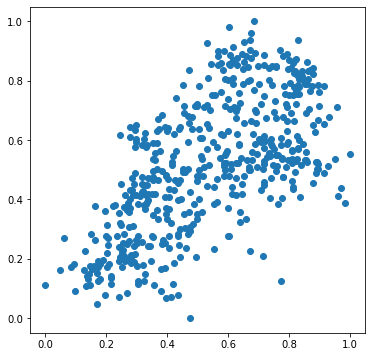

In [189]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [190]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [191]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [192]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 12),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 11),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 9),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 7),
 ('wed', False, 13),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 15),
 ('winter', True, 1)]

In [193]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'july', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring',
       'winter'],
      dtype='object')


In [194]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [195]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [196]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [197]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,temp,52.82
4,atemp,51.48
2,workingday,40.81
9,sat,9.96
10,sun,9.67
13,spring,2.55
1,holiday,2.54
5,hum,1.90
14,winter,1.79
12,Misty,1.57


humidity shows high VIF value.

In [198]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.1
Date:                Wed, 18 May 2022   Prob (F-statistic):          8.89e-189
Time:                        23:30:33   Log-Likelihood:                 511.35
No. Observations:                 510   AIC:                            -992.7
Df Residuals:                     495   BIC:                            -929.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2422      0.025      9.

In [199]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,52.82
4,atemp,51.26
2,workingday,23.75
8,sat,6.21
9,sun,5.79
12,spring,2.53
1,holiday,1.88
13,winter,1.73
6,july,1.28
5,windspeed,1.12


VIF values seems to be good now. But trying to redure it further

In [200]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Wed, 18 May 2022   Prob (F-statistic):          1.51e-186
Time:                        23:30:41   Log-Likelihood:                 503.28
No. Observations:                 510   AIC:                            -978.6
Df Residuals:                     496   BIC:                            -919.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1778      0.020      9.

In [201]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,52.82
4,atemp,51.26
2,workingday,23.75
8,sat,6.21
9,sun,5.79
12,spring,2.53
1,holiday,1.88
13,winter,1.73
6,july,1.28
5,windspeed,1.12


In [202]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Wed, 18 May 2022   Prob (F-statistic):          1.51e-186
Time:                        23:30:47   Log-Likelihood:                 503.28
No. Observations:                 510   AIC:                            -978.6
Df Residuals:                     496   BIC:                            -919.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1778      0.020      9.

VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [203]:
# We can drop atemp variable as it has high p-value
X_train_new = X_train_new.drop(['atemp'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,workingday,23.29
7,sat,6.11
8,sun,5.69
3,temp,2.83
11,spring,2.53
1,holiday,1.87
12,winter,1.71
5,july,1.28
6,sep,1.11
4,windspeed,1.08


In [204]:
# Building 3rd linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Wed, 18 May 2022   Prob (F-statistic):          1.26e-187
Time:                        23:30:53   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1795      0.020      9.

In [205]:
# We can drop holiday variable as it has high p-value
X_train_new = X_train_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,workingday,13.12
2,temp,12.38
3,windspeed,4.48
6,sat,3.77
7,sun,3.54
10,spring,2.44
0,yr,2.07
11,winter,1.78
9,Misty,1.58
4,july,1.37


In [206]:
# Building 4th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Wed, 18 May 2022   Prob (F-statistic):          1.26e-187
Time:                        23:31:00   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1553      0.035      4.

In [207]:
# We can drop sun variable as it has high p-value
X_train_new = X_train_new.drop(['sun'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.55
1,workingday,4.47
3,windspeed,4.11
0,yr,2.06
9,spring,1.81
6,sat,1.79
8,Misty,1.55
10,winter,1.44
4,july,1.36
5,sep,1.20


In [208]:
# Building 5th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.8
Date:                Wed, 18 May 2022   Prob (F-statistic):          7.02e-188
Time:                        23:31:21   Log-Likelihood:                 500.83
No. Observations:                 510   AIC:                            -977.7
Df Residuals:                     498   BIC:                            -926.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2051      0.025      8.

In [209]:
# We can drop sep variable as it has high p-value
X_train_new = X_train_new.drop(['sep'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.12
1,workingday,4.47
3,windspeed,4.07
0,yr,2.06
8,spring,1.80
5,sat,1.79
7,Misty,1.54
9,winter,1.44
4,july,1.31
6,Light_snowrain,1.08


In [ ]:
VIF value now seems to be good as it came closer to 5.

We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

F-Statistics value of 231.8 (which is greater than 1) and the p-value of 7.89e-41 i.e almost equals to zero, states that the overall model is significant

In [211]:
# Checking the parameters and their coefficient values
lr_6.params

const             0.205125
yr                0.234595
workingday        0.054138
temp              0.449380
windspeed        -0.141228
july             -0.070169
sep               0.053792
sat               0.065664
Light_snowrain   -0.289531
Misty            -0.081084
spring           -0.113107
winter            0.045674
dtype: float64

In [212]:
X_train_lm_6

,const,yr,workingday,temp,windspeed,july,sep,sat,Light_snowrain,Misty,spring,winter
576,1.0,1,1,0.815169,0.264686,1,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,0,1,1,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,1,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0,0
111,1.0,0,1,0.345824,0.380981,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,0,1,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,1,0,1
79,1.0,0,1,0.462664,0.529881,0,0,0,0,1,0,0


In [213]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

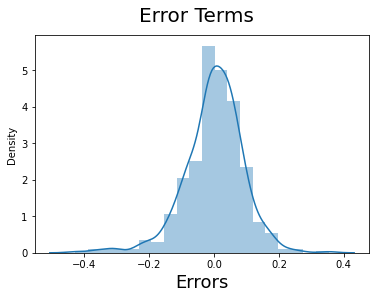

In [214]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [215]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,6.12
1,workingday,4.47
3,windspeed,4.07
0,yr,2.06
8,spring,1.80
5,sat,1.79
7,Misty,1.54
9,winter,1.44
4,july,1.31
6,Light_snowrain,1.08


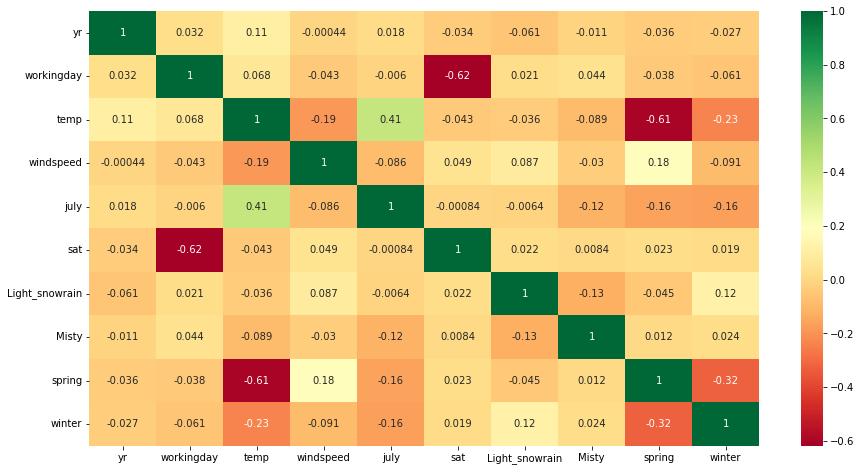

In [216]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

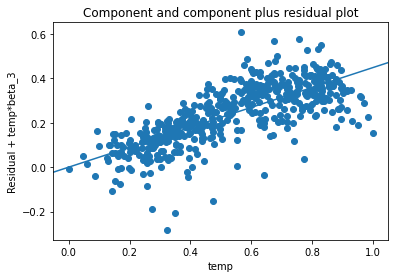

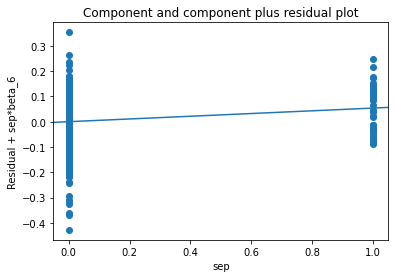

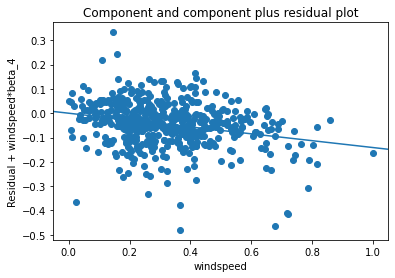

In [217]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()


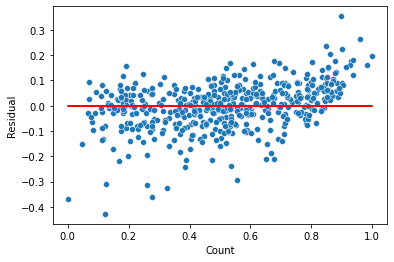

In [218]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [219]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [220]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [221]:
y_test = df_test.pop('cnt')
X_test = df_test

In [230]:
#BUILDING MODEL USING STATSMODEL:

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [227]:
y_pred = lr_6.predict(X_train_rfe1)

ValueError: shapes (220,11) and (12,) not aligned: 11 (dim 1) != 12 (dim 0)

In [225]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

NameError: name 'y_pred' is not defined

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [ ]:
round(lr_6.params,4)

We can see that the equation of our best fitted line is:

𝑐𝑛𝑡=0.1909+0.2341×𝑦𝑒𝑎𝑟−0.0963×ℎ𝑜𝑙𝑖𝑑𝑎𝑦+0.4777×𝑡𝑒𝑚𝑝−0.1481×𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑+0.0910×𝑠𝑒𝑝−0.2850×𝐿𝑖𝑔ℎ𝑡𝑠𝑛𝑜𝑤𝑟𝑎𝑖𝑛−0.0787×𝑀𝑖𝑠𝑡𝑦−0.0554×𝑠𝑝𝑟𝑖𝑛𝑔+0.0621×𝑠𝑢𝑚𝑚𝑒𝑟+0.0945×𝑤𝑖𝑛𝑡𝑒𝑟

In [ ]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

In [ ]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()